In [2]:
# Importing the necessary libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from Bio import SeqIO # Biopython library for reading fasta files

In [3]:
#load data
fasta_file = "ncbi_dataset/ncbi_dataset/data/GCF_002220155.1/GCF_002220155.1_ASM222015v1_genomic.fna"  #genome file
gtf_file = "ncbi_dataset/ncbi_dataset/data/GCF_002220155.1/genomic.gtf" #Gtf file

In [4]:
# Read the FASTA file
sequences = list(SeqIO.parse(fasta_file, "fasta"))

# Access the first sequence in the list
for i in range(len(sequences)):
    print(f"ID: {sequences[i].id}")
    print(f"Description: {sequences[i].description}")
    print(f"Sequence length: {len(sequences[i].seq)}")
    print("-" * 50)

ID: NZ_CP011835.1
Description: NZ_CP011835.1 Azotobacter chroococcum strain B3 chromosome, complete genome
Sequence length: 4575910
--------------------------------------------------
ID: NZ_CP011837.1
Description: NZ_CP011837.1 Azotobacter chroococcum strain B3 plasmid pacX50dB3a
Sequence length: 74783
--------------------------------------------------
ID: NZ_CP011836.1
Description: NZ_CP011836.1 Azotobacter chroococcum strain B3 plasmid pacX50fB3
Sequence length: 306103
--------------------------------------------------
ID: NZ_CP011838.1
Description: NZ_CP011838.1 Azotobacter chroococcum strain B3 plasmid pacx50dB3b
Sequence length: 66259
--------------------------------------------------


In [5]:
#selecting Accession CP011835.1, complete genome, chromosome
chromosome = sequences[0]
sequence = chromosome.seq

In [6]:
#taking the loci of gene with gtf file
data_frame = pd.read_csv(gtf_file, sep="\t", comment="#", header=None)
data_frame.columns = ['sequence_name', 'source', 'feature', 'start', 'end', 'score', 'strand', 'frame', 'attribute']
print(data_frame.head())

#feature : CDS - coding sequence
#score : (.) for unknown.
#strand : (+) forward , (-) reverse strand.
#frame : (.) for feature is not a coding sequence,
#        (0) for feature starts at the first base of codon,
#        (1) for feature starts at the second base of a codon,
#        (2) for feature starts at the third base of a codon.


   sequence_name            source      feature  start   end score strand  \
0  NZ_CP011835.1            RefSeq         gene   1467  2570     .      +   
1  NZ_CP011835.1  Protein Homology          CDS   1467  2567     .      +   
2  NZ_CP011835.1  Protein Homology  start_codon   1467  1469     .      +   
3  NZ_CP011835.1  Protein Homology   stop_codon   2568  2570     .      +   
4  NZ_CP011835.1            RefSeq         gene   2589  3692     .      +   

  frame                                          attribute  
0     .  gene_id "ACG10_RS00010"; transcript_id ""; db_...  
1     0  gene_id "ACG10_RS00010"; transcript_id "unassi...  
2     0  gene_id "ACG10_RS00010"; transcript_id "unassi...  
3     0  gene_id "ACG10_RS00010"; transcript_id "unassi...  
4     .  gene_id "ACG10_RS00015"; transcript_id ""; db_...  


In [7]:
sense_strand = data_frame[(data_frame['strand'] == '+') & (data_frame['feature'] == 'gene')]
print(sense_strand.head())

    sequence_name  source feature  start   end score strand frame  \
0   NZ_CP011835.1  RefSeq    gene   1467  2570     .      +     .   
4   NZ_CP011835.1  RefSeq    gene   2589  3692     .      +     .   
8   NZ_CP011835.1  RefSeq    gene   3698  6118     .      +     .   
12  NZ_CP011835.1  RefSeq    gene   6425  7786     .      +     .   
16  NZ_CP011835.1  RefSeq    gene   8291  9853     .      +     .   

                                            attribute  
0   gene_id "ACG10_RS00010"; transcript_id ""; db_...  
4   gene_id "ACG10_RS00015"; transcript_id ""; db_...  
8   gene_id "ACG10_RS00020"; transcript_id ""; db_...  
12  gene_id "ACG10_RS00025"; transcript_id ""; db_...  
16  gene_id "ACG10_RS00030"; transcript_id ""; db_...  


In [8]:
#extract sequences Obtain 100 bases upstream and 3 bases downstream for all of the genes of the sense strand
def extract_seq(sequence, sense_strand):
    '''
    Extract sequence from the genome for each gene in the sense strand
    '''
    gene_sequences = []
    for _, row in sense_strand.iterrows():
        if row['start'] - 101 < 0 or row['end'] +3 > len(sequence):
            continue
        else:
            start = row['start'] -101
            end = row['end'] +3
            gene_sequence = sequence[start:end]
            if len(gene_sequence) <= 106:
                print(f"{len(gene_sequence)} start {row['start']} end {row['end']}")
            gene_sequences.append(str(gene_sequence))
    return gene_sequences

#extract sequence
gene_seq_array = extract_seq(sequence, sense_strand)

print("Number of sequences extracted: ", len(gene_seq_array))
print("Length of first sequence: ", len(gene_seq_array[2226]))
print("First sequence: ", gene_seq_array[2226])

Number of sequences extracted:  2457
Length of first sequence:  358
First sequence:  GGCTTGACCGCGATCATCTCGGTCAAGGTGCCGGATCCCAAGTTCAGCTCGCAGACCAAGGACAAGCTGGTCTCCAGCGAGGTGAAGACCGCCGTCGAACAGGAGATGGGCAAGCATTTCGGCGATTTCCTGCTGGAGAATCCCAACGAGGCCAAGGCGGTGGTCGGCAAGATGATCGATGCCGCCCGTGCCCGCGAGGCCGCGCGCAAGGCCCGCGAGATGACCCGCCGCAAGGGCGCGCTGGACATCGCCGGCCTGCCTGGCAAGCTGGCCGACTGCCAGGAGAAGGACCCTGCCCTCTCCGAACTCTACATCGTCGAGGGTGACTCCGCCGGCGGCTCGGCCAAGCAGGGCCGCA


In [9]:
#initially to confirm the sequences are extracted correctly, presence of methionine at each coding seq checked

def check_methionine(gene_seq_array):
    methionine = 0
    not_methionine = 0
    for i in range(len(gene_seq_array)):
        if gene_seq_array[i][100:103] == 'ATG':
            methionine += 1
            print(f"(Methionine) {i}")
        else:
            not_methionine += 1
            print(f"                    (Not- Methionine) {i}")
    print(f"Methionine count: {methionine}")
    print(f"                            Not Methionine count: {not_methionine}")
    print(f"percentage of methionine: {methionine/len(gene_seq_array)*100}%")
    
check_methionine(gene_seq_array) #not all coding regions start with ATG, majority is
for i in range(len(gene_seq_array)):
    if len(gene_seq_array[i]) <= 104:
        print(f"Length of sequence {i} is {len(gene_seq_array[i])}")

Methionine count: 1911
                            Not Methionine count: 546
percentage of methionine: 77.77777777777779%


1. Perform a standard local search (for an intact query) to locate the WWWW promoter within each sequence. Obtain the percentage of genes with potential promoters and the distribution of the upstream position. 

In [10]:
match_score = 1
gap_penalty = -2
#first all the A, T are replaced by W in the sequences
def replace_A_T_with_W(gene_seq):
    '''return A,T replaced by W'''
    return ''.join(['W' if base in 'AT' else base for base in gene_seq])

#Then selection of whether it's a match or a mismatch
def match_mismatch_score(base1, base2, match_score=match_score, mismatch_score=-(match_score)):
    '''return match score if base1 == base2, else mismatch score'''
    return match_score if base1 == base2 else mismatch_score

#standard local search for intact query (gap penalty > match)

def scoring_matrix(sequence, promoter="WWWW", match_score=match_score, mismatch_score=-(match_score), gap_penalty=gap_penalty):
    '''
    Calculate values for local alignment
    '''
    len_sequence = len(sequence)
    len_promoter = len(promoter)
    score_matrix = np.zeros((len_sequence + 1, len_promoter + 1)) #scoremat initialized
    
    for i in range(1, len_sequence + 1):
        for j in range(1, len_promoter + 1):
            match = score_matrix[i-1, j-1] + match_mismatch_score(sequence[i-1], promoter[j-1])
            delete = score_matrix[i-1, j] + gap_penalty
            insert = score_matrix[i, j-1] + gap_penalty
            score_matrix[i, j] = max(match, delete, insert, 0) #for global remove 0
    
    return score_matrix

def local_traceback(sequence, promoter="WWWW", match_score=match_score, mismatch_score=-(match_score), gap_penalty=gap_penalty):
    '''
    Traceback for local alignment
    '''
    score_matrix = scoring_matrix(sequence, promoter)
    # Find the cell with the highest score
    max_value = score_matrix.max()
    i, j = np.unravel_index(score_matrix.argmax(), score_matrix.shape) # take the first found max_value index 
    #Note, i do the traceback to reversed sequence to obtain closest promoter to the coding sequence
    
    aligned_sequence = []
    aligned_promoter = []
    
    while i > 0 and j > 0 and score_matrix[i, j] > 0:
        temp_score = score_matrix[i, j]
        if temp_score == score_matrix[i-1, j-1] + match_mismatch_score(sequence[i-1], promoter[j-1]):
            aligned_sequence.append(sequence[i-1])
            aligned_promoter.append(promoter[j-1])
            i -= 1  
            j -= 1          
        elif score_matrix[i, j] == score_matrix[i, j-1] + gap_penalty:
            aligned_sequence.append('-')
            aligned_promoter.append(promoter[j-1])
            j -= 1
        elif score_matrix[i, j] == score_matrix[i-1, j] + gap_penalty:
            aligned_sequence.append(sequence[i-1])
            aligned_promoter.append('-')
            i -= 1
        else:
            break
    
    aligned_sequence = ''.join(aligned_sequence[::-1])
    aligned_promoter = ''.join(aligned_promoter[::-1])
    start_position = (int(i),int(j))
    
    return aligned_sequence, aligned_promoter, start_position

In [11]:
#aliging the given sequences

alignments = []
for i in range(len(gene_seq_array)):
    promoter_region = gene_seq_array[i][100-12::-1]    #leaving 4 codons (-12 base pairs) omitted in the promoter search to leave enough room to replicate
    #promoter region is reversed to find the promoter closest to the coding region
    seq = replace_A_T_with_W(promoter_region)
    aligned_sequence, aligned_promoter, start_position = local_traceback(seq)
    
    if "WWWW" not in aligned_sequence:
        pass
    else:
        alignments.append([i, promoter_region[start_position[0]:start_position[0]+4], 85-start_position[0]])
    
promoter_percentage = (len(alignments)/ len(gene_seq_array)) * 100
print(alignments)
print(f"percentage of promoters: {promoter_percentage}")

[[3, 'TTAA', 52], [4, 'AAAA', 13], [7, 'TTTA', 32], [9, 'TTTT', 72], [10, 'ATTA', 68], [11, 'TTTT', 64], [12, 'TTAA', 50], [14, 'TTAA', 79], [19, 'TTAA', 73], [24, 'AAAA', 75], [25, 'AAAA', 79], [26, 'TTTA', 82], [27, 'TTTT', 16], [28, 'TAAA', 52], [29, 'TTTT', 83], [32, 'TTAT', 12], [33, 'TTTA', 23], [35, 'TTTT', 73], [36, 'ATTT', 80], [37, 'AATA', 84], [38, 'ATAA', 82], [40, 'AATT', 82], [42, 'TTAT', 74], [45, 'ATAA', 64], [46, 'TTTT', 70], [47, 'ATTA', 69], [49, 'AAAA', 48], [50, 'AAAA', 34], [51, 'ATAA', 81], [52, 'TTAT', 77], [53, 'AAAA', 85], [54, 'TATT', 20], [55, 'AAAA', 81], [56, 'TTTT', 72], [57, 'ATTA', 17], [59, 'TAAA', 62], [60, 'AAAT', 65], [61, 'ATAT', 63], [65, 'ATTT', 55], [68, 'TTAA', 73], [72, 'ATTT', 67], [75, 'AAAA', 14], [76, 'ATTA', 21], [77, 'TTTT', 82], [78, 'AAAA', 81], [79, 'TAAA', 76], [82, 'TAAA', 77], [85, 'TAAA', 75], [86, 'TAAA', 21], [88, 'AAAA', 17], [89, 'TTTT', 80], [91, 'TTTA', 45], [94, 'AAAA', 16], [95, 'TATT', 24], [96, 'TATA', 76], [97, 'AATA', 

1486 promoters found out of 2457


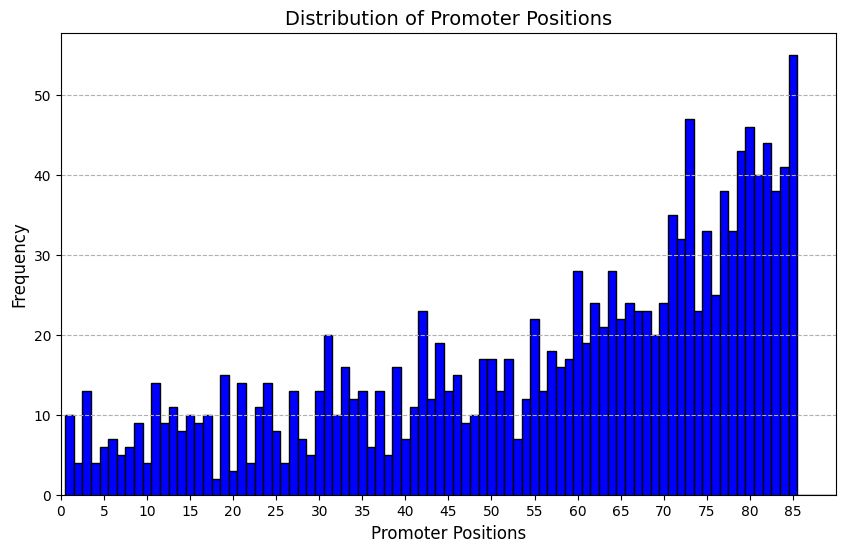

In [12]:
# Function to plot promoter position distribution
def plot_promoter_distribution(promoter_positions):
    '''
    Plot the promoter position distribution
    '''
    plt.figure(figsize=(10, 6))
    bins = range(1, 102)  # Define bins to cover the range 1 to 100
    plt.hist(promoter_positions, bins=bins, color='blue', edgecolor='black', align='left')
    plt.title("Distribution of Promoter Positions", fontsize=14)
    plt.xlabel("Promoter Positions", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.xticks(range(min(promoter_positions), max(promoter_positions) +1, 5))  # Set ticks every 5 units for clarity
    plt.xlim(min(promoter_positions), max(promoter_positions) + 5)  # Ensure the x-axis is restricted to 1 to 100
    plt.show()

positions_list = [output[2] for output in alignments]  # Extract only the positions
print(f"{len(positions_list)} promoters found out of {len(gene_seq_array)}")

# Call the plotting function
plot_promoter_distribution(positions_list)

2. If a WWWW promoter is found find the number of consecutive Ws. Obtain the
distribution of the number consecutive Ws. 

In [13]:
def get_full_lengths(seq, pos):
    '''
    get full length of consecutive "W" with the found "WWWW" promoter section
    '''
    start = pos
    end = pos + 3

    # Extend backward to include all contiguous A or T
    while start > 0 and seq[start - 1] in "AT":
        start -= 1

    # Extend forward to include all contiguous A or T
    while end < len(seq) - 1 and seq[end + 1] in "AT":
        end += 1
    promoter_seq = seq[start: end + 1]
    full_promoters = [start, len(promoter_seq), promoter_seq]
    return full_promoters

promoter_lengths = []
for index,i in enumerate(positions_list):
    full_prom = get_full_lengths(gene_seq_array[alignments[index][0]], i)
    promoter_lengths.append(full_prom[1])

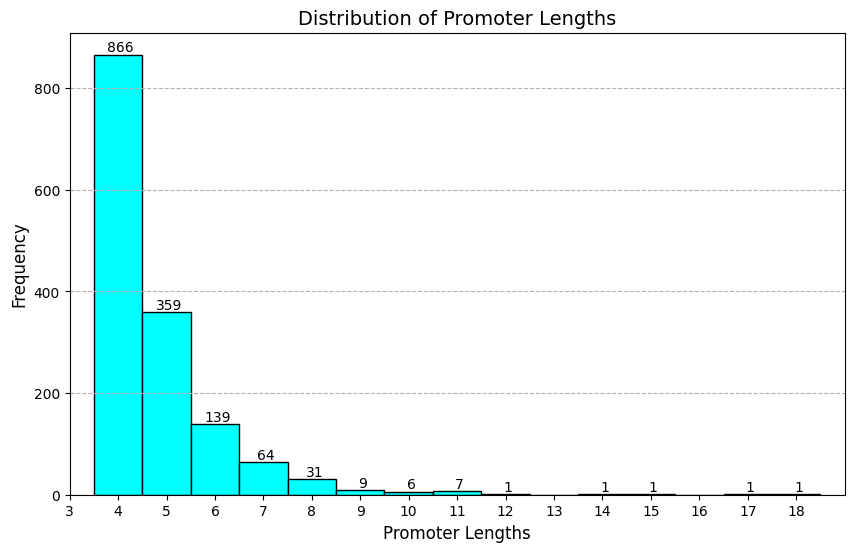

In [14]:
def plot_promoter_length_distribution(length_of_promoters):
    '''
    plot full promoter length distribution of the promoter "WWWW" which was already found
    '''
    plt.figure(figsize=(10, 6))

    # Create the histogram and get bin edges and frequencies
    bins = range(min(length_of_promoters), max(length_of_promoters) + 2)  # +2 to include the last bin
    counts, bin_edges, _ = plt.hist(length_of_promoters, bins=bins, color='cyan', edgecolor='black', align='left')

    # Annotate each bar with the count
    for count, edge in zip(counts, bin_edges[:-1]):
        if count > 0:  # Only annotate bars with non-zero counts
            plt.text(edge + 0.05, count, int(count), ha='center', va='bottom', fontsize=10)

    # Customize the plot
    plt.title("Distribution of Promoter Lengths", fontsize=14)
    plt.xlabel("Promoter Lengths", fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.grid(axis='y', linestyle='--')
    plt.xticks(range(3, 19, 1))  # Set ticks every 5 units for clarity
    plt.xlim(3,19)  # Ensure the x-axis is restricted to 1 to 100
    plt.show()
    
plot_promoter_length_distribution(promoter_lengths)          

3. Obtain the sequence starting from each upstream position of (1) which is 6 bases long (regardless of its C/G content). Calculate the position probability matrix.

In [26]:
def get_upstream_sequences(positions_list, gene_seq_array=gene_seq_array, alignments=alignments):
    '''
    Getting upstream sequences of the promoter which is 6 base pairs long
    '''
    upstream_sequences = []
    for index, i in enumerate(positions_list):
        upstream_seq = gene_seq_array[alignments[index][0]][i:i+6]
        upstream_sequences.append(upstream_seq)
    return upstream_sequences

def calculate_ppm(promoter_position, gene_seq_array=gene_seq_array, alignments=alignments):
    '''
    Calculate ppm for each promoter that is 6 positions long for the initial positions already found
    '''
    bases = ['A', 'C', 'G', 'T']
    ppm = np.zeros((4, 6))  # 4 rows for A, T, C, G and columns for each position
    upstream_sequences = get_upstream_sequences(promoter_position)
    for seq in upstream_sequences:
        for pos, base in enumerate(seq):
            if base in bases:
                ppm[bases.index(base), pos] += 1
            else:
                print(f"{base} not in {bases}")
    
    # Normalize to get probabilities
    ppm = ppm / len(upstream_sequences)
    ppm += 1e-3 # Add pseudocount to avoid zeros
    ppm = ppm / ppm.sum(axis=0) # Renormalize to ensure columns sum to 1
    
    #calculate consensus score to find best possible alignment as a baseline
    Consensus_score = 0
    for col in range(len(ppm[0])):
        Consensus_score += np.log(max(row[col] for row in ppm))
        
    return ppm, Consensus_score

In [27]:
ppm, consensus_score = calculate_ppm(positions_list)

# Creating a pandas DataFrame for better alignment
df = pd.DataFrame(ppm, columns=["(1)", "(2)", "(3)", "(4)", "(5)", "(6)"], index=["(A)", "(C)", "(G)", "(T)"])
print(df.round(3))
print(f"\nConsensus score: {consensus_score}")

       (1)    (2)    (3)    (4)    (5)    (6)
(A)  0.569  0.498  0.468  0.405  0.008  0.219
(C)  0.001  0.001  0.001  0.001  0.600  0.350
(G)  0.001  0.001  0.001  0.001  0.388  0.270
(T)  0.429  0.500  0.530  0.593  0.004  0.162

Consensus score: -3.976640016300933


4. Using the position probability matrix of (3) obtain a statistical alignment of the same sequences.

In [17]:
def norm_score(window,ppm=ppm, consensus_score=consensus_score):
    '''
    calculating norm.score of each alignments
    window = 6 bases of the upstream sequence
    '''
    bases = ['A', 'C', 'G', 'T']
    score = -consensus_score
    for i, base in enumerate(window):
        score += np.log(ppm[bases.index(base), i])
    return score

threshold = -6

def Statistical_alignment(sequence, ppm = ppm, threshold = threshold):
    '''
    Aligning the promoters by calculating alignment scores with already found ppm
    '''
    window_size = ppm.shape[1]
    max_score = -np.inf  # asigning smallest possible value
    max_sequence = None
    max_seq_start_position = None
    
    for i in range(100 - window_size + 1 - 9): # 9((WWWW - 12 bases, size 6 promoter - 9) is the number of bases omitted in the promoter search
        window = sequence[i:i+window_size]
        score = norm_score(window, ppm)
        if score > max_score: # finding the best possible alignment
            max_score = score
            max_sequence = window
            max_seq_start_position = i
        
    if max_score > threshold: #if not above threshold value we consider the promoter to be unavailable
        return max_sequence, max_seq_start_position
    else:
        return None, None

In [18]:
#aliging the given sequences

stat_alignments = []
for i in range(len(gene_seq_array)):
    max_sequence, max_seq_start_position = Statistical_alignment(gene_seq_array[i])
    
    if max_sequence is not None:
        stat_alignments.append([i, max_sequence, max_seq_start_position])
    else:
        pass
    
promoter_percentage = (len(stat_alignments)/ len(gene_seq_array)) * 100
print(stat_alignments)
print(f"percentage of promoters: {promoter_percentage} for threshold value {threshold}")

[[3, 'AATTGA', 5], [4, 'AAAAGT', 13], [7, 'ATTTCA', 32], [9, 'TTTTCA', 72], [10, 'ATTACG', 68], [11, 'AAAACG', 26], [12, 'AATTCC', 50], [14, 'AATTCG', 79], [19, 'AATTCT', 73], [24, 'AAAACC', 75], [25, 'TTTACC', 69], [26, 'AAATGC', 33], [27, 'TTTTGC', 16], [28, 'TATACC', 40], [29, 'TTTTCC', 83], [32, 'TATTCG', 12], [33, 'ATTTCC', 23], [35, 'TTTTCC', 73], [36, 'TTTACA', 80], [37, 'ATAAGG', 84], [38, 'AATAGA', 82], [40, 'TTAAGG', 82], [42, 'TATTCA', 74], [45, 'AAAACG', 37], [46, 'TTTTCC', 70], [47, 'ATTACA', 69], [49, 'AAAACG', 48], [50, 'AAAAGC', 28], [51, 'ATTTGG', 70], [52, 'TATTCT', 77], [53, 'TATTGG', 63], [54, 'TTATCT', 20], [55, 'AAAAGG', 81], [56, 'TTTTGC', 72], [57, 'ATTACG', 17], [59, 'AAATGC', 62], [60, 'TAAAGC', 65], [61, 'TATACC', 63], [65, 'TTTACT', 55], [68, 'AATTCC', 73], [72, 'TTTACG', 67], [75, 'AAAACA', 14], [76, 'ATTACA', 21], [77, 'TTTTCT', 82], [78, 'AATTGC', 61], [79, 'AAATGC', 76], [82, 'AAATCT', 77], [85, 'AAATCA', 75], [86, 'AAATCC', 11], [88, 'AAAACC', 17], [89,

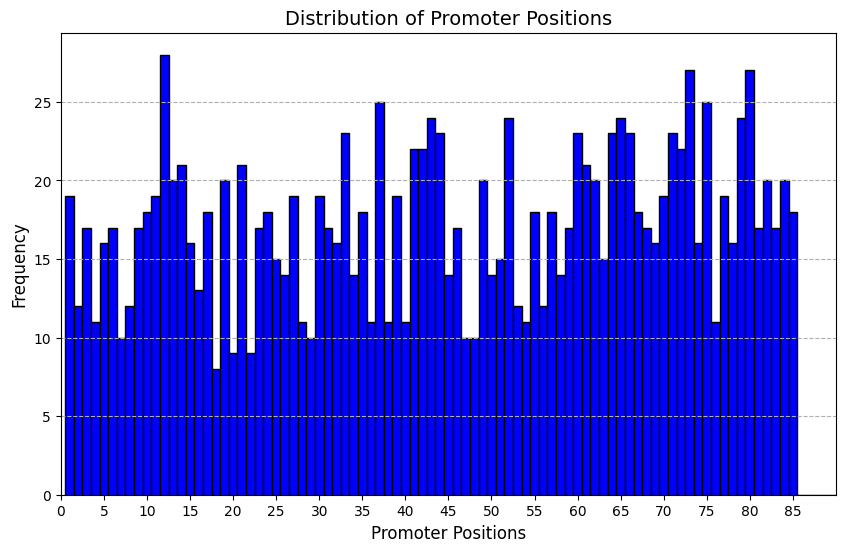

In [19]:
stat_positions_list = [output[2] for output in stat_alignments]  # Extract only the positions
plot_promoter_distribution(stat_positions_list)

5. Compare the percentage of promoters detected and position distribution results of the two searches. Comment on the results.

In [22]:
for i in range(len(stat_alignments)):
    seq = stat_alignments[i][1]
    seq2 = replace_A_T_with_W(seq)
    if "WWWW" in seq2:
        pass
    else:
        print(stat_alignments[i])

for i in range(len(alignments)):
    if alignments[i][0] != stat_alignments[i][0]:
        print(f"index {i} {alignments[i][1]} {stat_alignments[i][1]}")
        
print(len(stat_alignments))
print(len(alignments))

1486
1486
